# Telco Churn Report
## By: Joann Balraj
#### November 29, 2021
----------

## Project Goals:
- Find drivers for customer churn at Telco. Why are customers churning?
- Build a Machine Learning classification model that outperforms the baseline model to accuractely predict customer churn.
- Document my process so that it can be presented to a non-data scientist, as well as read later like a report.

### Project Description:
At Telco, there is a big problem. Too many people are churning, and my goal is to find out why and present my take on how to reduce it. We will analyze the data and go through why people seem to be churning based on patterns in the data. We will also produce models to represent churn in relation to the drivers, specifically payment method and monthly charges. In the end we will look at reccomendations on how we can lower the customer churn rate in the future.

## Questions:
- Do customers who auto pay churn at different rates than customers who manual pay?
- Do customers who churn have a higher monthly bill on average than customers who do not churn

#### What drives customer churn at Telco?
### Key Findings:
- 27% of all customers churn
- Two drivers of churn discovered:
  - Customers who pay their bill with auto pay churn at lower rates
  - Customers who churn have higher monthly charges
- Baseline accuracy model for predicting churn has an accuracy of 74%
- The Random Forest Classifier model at the end of this report achieves an 80% accuracy rate on out of sample data


### Data Dictionary:
| Target| Description | Data Type |
|---------|-------------|-----------|
| churn | Indicates if a customer has churned or if they are still a Telco customer, 0 = not churned, 1 = has churned | int64 |

| Categorical Features | Description | Data Type |
|---------|-------------|-----------|
|senior_citizen| indicates if the customer is a senior citizen | int64 |
dependents | indicates if the customer has dependents | int64
phone_service | indicates if the customer has phone service with Telco | int64 |
multiple_lines | indicates if the customer with phone service has multiple lines | int64 |
online_security | indicates if the customer has online security services| int 64 |
online_backup | indicates if the customer has online backup services | int64 |
device_protection | indicates if the customer has device protection services | int64 |
tech_support | indicates if the customer has tech support services | int64 |
streaming_tv | indicates if the customer has tv streaming services | int64 |
streaming_movies | indicates if the customer has movie streaming services | int64 |
paperless_billing | indicates if the customer in enrolled in paperless billing | int64 |
internet_service_type_id | indicates which internet service (if any) the customer has | int64
gender_Male | indicates the the customers' gender identity | uint8
contract_type_id | indicates the type of contract the customer has with Telco | int64|
auto_bill_pay | indicates if the customer is enrolled in auto bill pay or not | int64|

| Continuous Features | Description | Data Type |
|---------|-------------|-----------|
| tenure | Indicates how many months the customer has been with Telco | int64 |
| monthly_charges | Indicates the customer's monthly bill | float64 |
| total_charges | Indicates the total amount the customer has been charged during their tenure | float64

## Wrangle Telco Data
To acquire the titanic data, I used the telco data csv file using the acquire module from the `env.py` file.

### Data Aquisition
Import tools and modules necessary for analysis. The acquire.py, prepare.py, and explore.py modules are included in the parent repo for this project.

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#standard imports
import numpy as np
import pandas as pd
import os

#stats tools
from math import sqrt
from scipy import stats
from scipy.stats import ttest_ind_from_stats

#visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#env & modules
from env import host, user, password
import acquire
import prepare
import explore

### Acquire the data

In [2]:
#Utilize the acquire module
telco = acquire.get_telco_data()

#### Initial data exploration

In [3]:
telco.shape
print(f'The telco dataframe has {telco.shape[1]} columns and {telco.shape[0]} rows')

The telco dataframe has 24 columns and 7043 rows


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
#Review summary stats for numeric columns
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
#How many unique values are in each column? 
for col in telco:
    print(f'{col} has {telco[col].nunique()} unique values.')

payment_type_id has 4 unique values.
contract_type_id has 3 unique values.
internet_service_type_id has 3 unique values.
customer_id has 7043 unique values.
gender has 2 unique values.
senior_citizen has 2 unique values.
partner has 2 unique values.
dependents has 2 unique values.
tenure has 73 unique values.
phone_service has 2 unique values.
multiple_lines has 3 unique values.
online_security has 3 unique values.
online_backup has 3 unique values.
device_protection has 3 unique values.
tech_support has 3 unique values.
streaming_tv has 3 unique values.
streaming_movies has 3 unique values.
paperless_billing has 2 unique values.
monthly_charges has 1585 unique values.
total_charges has 6531 unique values.
churn has 2 unique values.
internet_service_type has 3 unique values.
contract_type has 3 unique values.
payment_type has 4 unique values.


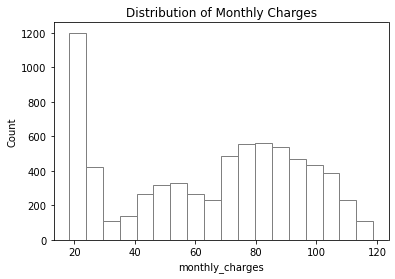

In [11]:
#Visualize factor - monthly charges
sns.histplot(data=telco.monthly_charges, color='white', edgecolor='grey')
plt.title('Distribution of Monthly Charges')
plt.show()

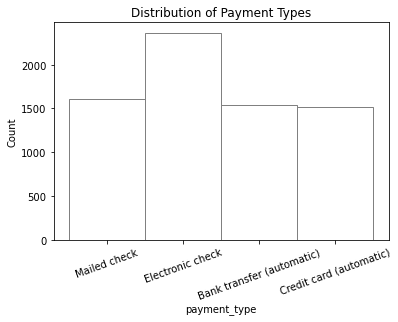

In [16]:
#Visualize another factor - payment types
sns.histplot(data=telco.payment_type, color='white', edgecolor='grey')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=20)
plt.show()

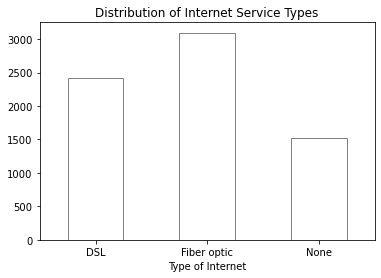

In [30]:
#Plot Internet Service Type as an example of a factor 
telco.internet_service_type.value_counts().sort_index().plot.bar(color=(0.0, 0.0, 0.0, 0.0), edgecolor='grey')
plt.title("Distribution of Internet Service Types")
plt.xlabel('Type of Internet')
plt.xticks(rotation=0)
plt.show()

### Acquire Takeaways
- Appears there are no null values
  - Incorrect. There were empty strings in the `total_charges` column that had to be dealt with
- Column that needs to be cleaned and prepared:
  - `total_charges`  - Need to convert from object to float
- Prep Question:
  - Some columns have more unique values than expected. Why?
    - online_security
    - online_backup
    - device_protection
    - tech_support
    - streaming_tv
    - streaming_movies